<a href="https://colab.research.google.com/github/jsebastianquiroga/PUJ_NLP_IA/blob/main/Talleres/Taller2/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Acceder a drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#Introducción
<img src = "https://drive.google.com/uc?id=161ZgI4HuY2Sy_3K5yJWc3lUdn_8Pe8qG">

* geo: geographical entity
* org: organization
* per: person
* gpe: geopolitical entity
* tim: time indicator
* art: artifact
* eve: event
* nat: natural phenomenon
* O: filler word

If you had the sentence

**"Sharon flew to Miami on Friday"**

The tags would look like:

```
Sharon B-per
flew   O
to     O
Miami  B-geo
on     O
Friday B-tim
```

where you would have three tokens beginning with B-, since there are no multi-token entities in the sequence. But if you added Sharon's last name to the sentence:

**"Sharon Floyd flew to Miami on Friday"**

```
Sharon B-per
Floyd  I-per
flew   O
to     O
Miami  B-geo
on     O
Friday B-tim
```

your tags would change to show first "Sharon" as B-per, and "Floyd" as I-per, where I- indicates an inner token in a multi-token sequence.

#Cargar los datos

In [3]:
# falta este archivo
data_path = "/tmp/ner_dataset.csv"
data = pd.read_csv(data_path, encoding= 'unicode_escape')
data.fillna(method = 'ffill', inplace = True)

tags = data.Tag.unique()

In [4]:
ready_dist_path = "/tmp/ner.csv"
ready_data = pd.read_csv(ready_dist_path)
ready_data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


#Data preprocessing

In [5]:
ready_data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [6]:
X = list(ready_data['Sentence'])
Y = list(ready_data['Tag'])

In [7]:
from ast import literal_eval
Y_ready = []

for sen_tags in Y:
    Y_ready.append(literal_eval(sen_tags))

In [8]:
print("First three sentences: \n")
print(X[:3])

First three sentences: 

['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', 'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "', 'They marched from the Houses of Parliament to a rally in Hyde Park .']


In [9]:
print("First three Tags: \n")
print(Y_ready[:3])

First three Tags: 

[['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']]


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
print("Number of examples: {}".format(len(X)))

Number of examples: 47959


##Vectorizar las oraciones

Nota: aca cambie el None por que None no es iterable y suelta error

In [12]:
# cutoff reviews after 110 words
maxlen = 110

# consider the top 36000 words in the dataset
max_words = 36000

# tokenize each sentence in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [13]:
word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))
ind2word = dict([(value, key) for (key, value) in word_index.items()])

Found 27953 unique tokens.


In [14]:
word2id = word_index

In [15]:
# dict. that map each identifier to its word
id2word = {}
for key, value in word2id.items():
    id2word[value] = key

##Sentences padding

Nota se reemplazan los none por

1. las secencias
2. maxima longitud definido arriba (# cutoff reviews after 110 words)
3. padding -> 'post' : llena de ceros despues del ultimo numero

https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

In [16]:
# pad the sequences so that all sequences are of the same size
X_preprocessed = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [17]:
# first example after tokenization and padding.
X_preprocessed[0]

array([ 260,    3,  997,   13, 1838,  245,  452,    4,  545,    1,  121,
          2,   60,    6,  595,    1,  861,    3,  184,   89,   21,   12,
         54,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [18]:
#EXPECTED OUTPUT
# first example after tokenization and padding.
#X_preprocessed[0]

In [19]:
X_preprocessed[22479]

array([ 9811,     2,   640,   454,  2760,   155,   944, 15986,  5319,
        1941,     3,    61,  4900,   155,  4877, 22425,  1941,    17,
       13036, 22426, 22427,     6,   699,   325,   428, 22428,  1941,
       13142, 13143, 22429, 22430,    47,   381,    25,  2859,   907,
       22431,  2166,     4,   155,  1229, 22432,  1941,     2,   754,
         629,     3,    61,  4899,   155,   975, 22433,  1941,    17,
       13036,     6,   699,   454,   428, 22434,  1941, 13142, 13143,
        1033,  1453,    21,     1,   257,  3560,    22,     1,  4417,
           3,     1,  5701,     3,  3783,  2111,  1028,  1243, 22435,
          61,  6936,  2197,  3486,     1,   135,  1185,   257,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

In [20]:
#EXPECTED OUTPUT
#22479 example after tokenization and padding.
#X_preprocessed[22479]

##Proprocesamiento de etiquetas

Toco agregar los tags -> no encontre forma de sacarlos, esto cambia los numeros

In [21]:
# dict. that map each tag to its identifier
tags2id = {}
for i, tag in enumerate(tags):
    tags2id[tag] = i

In [22]:
tags2id

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

In [23]:
# faltaba esto tambien
id2tag = {}
for key, value in tags2id.items():
    id2tag[value] = key

In [24]:
id2tag

{0: 'O',
 1: 'B-geo',
 2: 'B-gpe',
 3: 'B-per',
 4: 'I-geo',
 5: 'B-org',
 6: 'I-org',
 7: 'B-tim',
 8: 'B-art',
 9: 'I-art',
 10: 'I-per',
 11: 'I-gpe',
 12: 'I-tim',
 13: 'B-nat',
 14: 'B-eve',
 15: 'I-eve',
 16: 'I-nat'}

In [25]:
#EXPECTED OUTPUT
#id2tag

In [26]:
def preprocess_tags(tags2id, Y_ready):

    Y_preprocessed = []
    maxlen = 110
    # for each target
    for y in Y_ready:

        # place holder to store the new preprocessed tag list
        Y_place_holder = []

        # for each tag in rhe tag list
        for tag in y:
            # append the id of the tag in the place holder list
            Y_place_holder.append(tags2id[tag])

        # find the lenght of the new preprocessed tag list
        len_new_tag_list = len(Y_place_holder)
        # find the differance in length between the len of tag list and padded sentences
        num_O_to_add = maxlen - len_new_tag_list

        # add 'O's to padd the tag lists
        padded_tags = Y_place_holder + ([tags2id['O']] * num_O_to_add)
        Y_preprocessed.append(padded_tags)

    return Y_preprocessed

In [27]:
Y_preprocessed = preprocess_tags(tags2id, Y_ready)

In [28]:
print(Y_preprocessed[0])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
print(Y_ready[0])

['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


##Data shuffling and splitting

In [30]:
print("The Lenght of training examples: {}".format(len(X_preprocessed)))
print("The Lenght of training targets: {}".format(len(Y_preprocessed)))

The Lenght of training examples: 47959
The Lenght of training targets: 47959


In [31]:
X_preprocessed = np.asarray(X_preprocessed)
Y_preprocessed = np.asarray(Y_preprocessed)

In [32]:
# 70% of the datat will be used for training
training_samples = 0.7
# 15% of the datat will be used for validation
validation_samples = 0.15
# 15% of the datat will be used for testing
testing_samples = 0.15

In [33]:
indices = np.arange(len(Y_preprocessed))

In [34]:
np.random.seed(seed=555)
np.random.shuffle(indices)

In [35]:
X_preprocessed = X_preprocessed[indices]
Y_preprocessed = Y_preprocessed[indices]

In [36]:
X_train = X_preprocessed[: int(0.7 * len(X_preprocessed))]
print("Number of training examples: {}".format(len(X_train)))


X_val = X_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
print("Number of validation examples: {}".format(len(X_val)))


X_test = X_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]
print("Number of testing examples: {}".format(len(X_test)))



Y_train = Y_preprocessed[: int(0.7 * len(X_preprocessed))]
Y_val = Y_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
Y_test = Y_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]

print("Total number of examples after shuffling and splitting: {}".format(len(X_train) + len(X_val) + len(X_test)))

Number of training examples: 33571
Number of validation examples: 7194
Number of testing examples: 7194
Total number of examples after shuffling and splitting: 47959


#Entrenamiento y evaluación

In [37]:
X_train[1000]

array([ 374,   19,    1,  254,   28, 1072,    6,   11, 1201,   59,  412,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [38]:
Y_train[1000]

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
id2word[729]

'nigeria'

##Cargar el modelo como un dataset en tensorflow

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [41]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

##Model_1
2 redes bidireccionales
1 red de dense o feedFordward

Hyperparameters:


In [60]:
embedding_dim = 300
maxlen = 110
max_words = 36000
num_tags = len(tags)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen, name='embedding_1'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True), name='bidirectional_2'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True), name='bidirectional_3'),
    tf.keras.layers.Dense(num_tags, activation = "softmax", name='dense_1')
])

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 110, 300)          10800000  
                                                                 
 bidirectional_2 (Bidirectio  (None, 110, 200)         320800    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 110, 200)         240800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 110, 17)           3417      
                                                                 
Total params: 11,365,017
Trainable params: 11,365,017
Non-trainable params: 0
_________________________________________________________________


In [44]:
#EXPECTED OUTPUT
#model.summary()

In [45]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=3)

Epoch 1/3
255/255 [==============================] - 55s 168ms/step - loss: 0.1775 - accuracy: 0.9693 - val_loss: 0.1111 - val_accuracy: 0.9708
Epoch 2/3
255/255 [==============================] - 18s 72ms/step - loss: 0.0942 - accuracy: 0.9734 - val_loss: 0.0788 - val_accuracy: 0.9765
Epoch 3/3
255/255 [==============================] - 16s 63ms/step - loss: 0.0666 - accuracy: 0.9787 - val_loss: 0.0688 - val_accuracy: 0.9791


In [47]:
model.evaluate(test_dataset)

55/55 [==============================] - 1s 18ms/step - loss: 0.0675 - accuracy: 0.9794


[0.06748704612255096, 0.9793514609336853]

##Model_2

In [48]:
embedding_dim = 300
maxlen = 110
max_words = 36000
num_tags = len(tags)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen, name='embedding'),
    tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True, name='lstm'),
    tf.keras.layers.Dense(num_tags, activation = "softmax", name='dense')
])

In [49]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 110, 300)          10800000  
                                                                 
 lstm (LSTM)                 (None, 110, 100)          160400    
                                                                 
 dense (Dense)               (None, 110, 17)           1717      
                                                                 
Total params: 10,962,117
Trainable params: 10,962,117
Non-trainable params: 0
_________________________________________________________________


In [50]:
#EXPECTED OUTPUT
#model_2.summary()

In [51]:
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
history_2 = model_2.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=2)

Epoch 1/2
255/255 [==============================] - 29s 103ms/step - loss: 0.2513 - accuracy: 0.9654 - val_loss: 0.1238 - val_accuracy: 0.9696
Epoch 2/2
255/255 [==============================] - 17s 68ms/step - loss: 0.1103 - accuracy: 0.9715 - val_loss: 0.0985 - val_accuracy: 0.9736


##Desempeño modelo 2

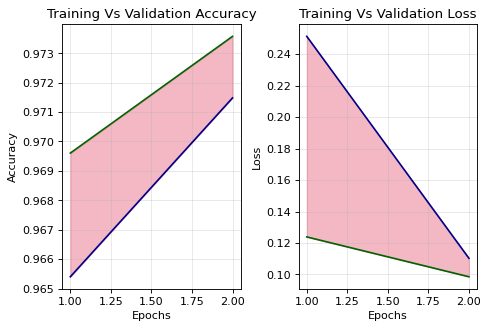

In [53]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 4), dpi=80)

ax[0].plot(epochs, acc, label = "Training Accuracy", color='darkblue')
ax[0].plot(epochs, val_acc, label = "Validation Accuracy", color='darkgreen')
ax[0].grid(alpha=0.3)
ax[0].title.set_text('Training Vs Validation Accuracy')
ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs')
plt.setp(ax[0], ylabel='Accuracy')


ax[1].plot(epochs, loss, label = "Training Loss", color='darkblue')
ax[1].plot(epochs, val_loss, label = "Validation Loss", color='darkgreen')
ax[1].grid(alpha=0.3)
ax[1].title.set_text('Training Vs Validation Loss')
ax[1].fill_between(epochs,loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[1], xlabel='Epochs')
plt.setp(ax[1], ylabel='Loss')

plt.show()

##Desempeño modelo 1

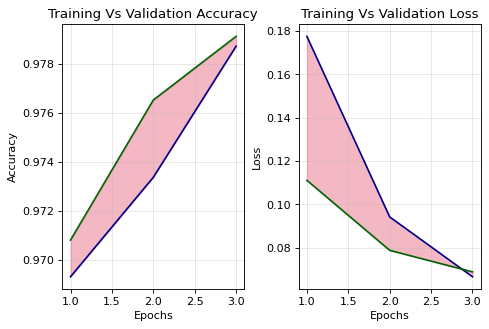

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 4), dpi=80)

ax[0].plot(epochs, acc, label = "Training Accuracy", color='darkblue')
ax[0].plot(epochs, val_acc, label = "Validation Accuracy", color='darkgreen')
ax[0].grid(alpha=0.3)
ax[0].title.set_text('Training Vs Validation Accuracy')
ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs')
plt.setp(ax[0], ylabel='Accuracy')


ax[1].plot(epochs, loss, label = "Training Loss", color='darkblue')
ax[1].plot(epochs, val_loss, label = "Validation Loss", color='darkgreen')
ax[1].grid(alpha=0.3)
ax[1].title.set_text('Training Vs Validation Loss')
ax[1].fill_between(epochs,loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[1], xlabel='Epochs')
plt.setp(ax[1], ylabel='Loss')

plt.show()

#Predicciones

In [55]:
def make_prediction(model, preprocessed_sentence, id2word, id2tag):

    #if preprocessed_sentence.shape() != (1, 110):
    preprocessed_sentence = preprocessed_sentence.reshape((1, 110))

    # return preprocessed sentence to its orginal form
    sentence = preprocessed_sentence[preprocessed_sentence > 0]
    word_list = []
    for word in list(sentence):
        word_list.append(id2word[word])
    orginal_sententce = ' '.join(word_list)

    len_orginal_sententce = len(word_list)

    # make prediction
    prediction = model.predict(preprocessed_sentence)
    prediction = np.argmax(prediction[0], axis=1)

    # return the prediction to its orginal form
    prediction = list(prediction)[ : len_orginal_sententce]

    pred_tag_list = []
    for tag_id in prediction:
        pred_tag_list.append(id2tag[tag_id])

    return orginal_sententce,  pred_tag_list

In [56]:
id2tag = {}
for key, value in tags2id.items():
    id2tag[value] = key

In [57]:
orginal_sententce,  pred_tag_list = make_prediction(model=model,
                                                    preprocessed_sentence=X_test[520],
                                                    id2word=id2word,
                                                    id2tag=id2tag)

1/1 [==============================] - 2s 2s/step


In [58]:
print(orginal_sententce)

tuesday the manhattan new york city prosecutor unsealed a multi count indictment against china based limmt economic and trade company and li fang wei one of the firm 's managers


In [59]:
print(pred_tag_list)

['B-tim', 'O', 'B-geo', 'I-geo', 'I-geo', 'I-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
